# Simulation of Projectile Motion in 2D - no air resistance

This is a very familiar problem from introductory classical mechanics, and as you may recall, there is an analytical solution to the problem.  So, in this sense, there is no need to simulate it.  However, it is often very useful to begin more complicated simulations, which we will eventually get to, by starting with the simplest case, so that we can test the mechanics of the simulation itself, to check for any errors, and also we can use it to understand something about the scaling behavior of the problem, i.e. how much computing power do we need to devote to the simulation in order to achieve the desired results?

For a projectile launched at an angle, $\theta$, with respect to the horizontal, with initial speed, $v_0$, we have that:

\begin{equation}
v_{0x} = v_0 cos(\theta) \\
v_{0y} = v_0 sin(\theta)
\end{equation}

If the projectile is launched from a height, $y_0$, above the ground, then we have that:

\begin{equation}
x(t) = v_0 cos(\theta) t \\
y(t) = y_0 + v_0 sin(\theta) t - \frac{1}{2} g t^2 \\
v_x(t) = v_0 cos(\theta) \\
v_y(t) = v_0 sin(\theta) - g t
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here, but you will need to set
# dark_mode = False

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

## Approximation Methods

### Euler's Method

One of the simplest methods for approximating/simulating this motion is due to Leonhard Euler (of course).  The algorithm is as follows:

* Choose the initial position and velocity, in both directions, i.e. $x_0, y_0, v_{0x}, v_{0y}$
* Choose a time "small" time interval, $\tau$.
* Calculate the position of the object at the end of this time interval, using a LINEAR approximation, viz. 

\begin{equation}
x_{n+1} = x_{n} + v_{nx}*\tau \\
y_{n+1} = y_{n} + v_{ny}*\tau \\
\end{equation}

* Calculate the velocity of the object at the end of this time interval, using a LINEAR approximation, viz. 

\begin{equation}
v_{n+1} = v_{n} + a_{xn}*\tau \\
v_{n+1} = v_{n} + a_{yn}*\tau \\
\end{equation}

* Iterate Equations (3) and (4) until some condition is met

In [2]:
# Define the initial conditions of the motion
v0 = 6.96
theta_degrees = 30.0
y0 = 1.1

# Define the time interval, dt, for the simulation
dt = 0.001

###################################################################$
####### Should be no need for changes below here, by users #########
####################################################################

# Define x and y components of velocity and acceleration
theta = theta_degrees*np.pi/180.0
x0 = 0.0
v0y = v0*np.sin(theta)
v0x = v0*np.cos(theta)
ay = -9.799
ax = 0.0

# Set up arrays for x, y, vx, vy, t, and also arrays for theory prediction
y = []
x = []
t = []
vy = []
vx = []

y_t = []
x_t = []
vy_t = []
vx_t = []

y.append(y0)
x.append(x0)
vy.append(v0y)
vx.append(v0x)
t.append(0.0)

y_t.append(y0)
x_t.append(x0)
vy_t.append(v0y)
vx_t.append(v0x)

y_current = y[0]
x_current = x[0]
vy_current = vy[0]
vx_current = vx[0]
t_current = t[0]

# Theory:
# v = v0 + a_yt
# y = y0 + v0y*t + 1/2*a_y*t**2
# x = x0 + v0x*t + 1/2*a_x*t**2
# 
# Let y = 0 (i.e. projectile comes back to earth)
#
# 0 = y0 + v0y*t + 1/2*a_y*t**2
#
# Therefore, we have that:
# t = (-v0y +/- sqrt(v0y**2 - 2*y0*a_y))/(a_y)
#

t_theory = (-v0y - np.sqrt(v0y**2 - 2.0*y0*ay))/(ay)
print("Expected Total Time = ",t_theory)

# Main loop to calculate position and velocity as a function of time
n=1
while (y_current > 0):
    y_current = y_current + vy_current*dt
    x_current = x_current + vx_current*dt
    vy_current = vy_current + ay*dt
    vx_current = vx_current + ax*dt
    t_current = t_current + dt
    
    y.append(y_current)
    x.append(x_current)
    vy.append(vy_current)
    vx.append(vx_current)
    t.append(t_current)
    
    y_t.append(y0+v0y*t_current+0.5*ay*t_current**2)
    x_t.append(x0+v0x*t_current+0.5*ax*t_current**2)
    vy_t.append(v0y+ay*t_current)
    vx_t.append(v0x+ax*t_current)
    
    if (n%100 == 0):
        print ("Current y value = ",y_current)
    
    n = n + 1

print("Simulated Total Time = ",t_current)

Expected Total Time =  0.9472834498642292
Current y value =  1.3994949499999996
Current y value =  1.600999899999998
Current y value =  1.7045148499999971
Current y value =  1.7100397999999968
Current y value =  1.617574749999996
Current y value =  1.427119699999996
Current y value =  1.1386746499999953
Current y value =  0.7522395999999939
Current y value =  0.267814549999991
Simulated Total Time =  0.9490000000000007


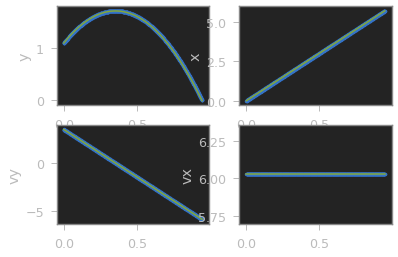

In [3]:
import matplotlib.pyplot as plt

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=2, ncols=2) 

# On the first axis, plot the y value 
axs[0][0].plot(t,y,'.') 
axs[0][0].plot(t,y_t) 
axs[0][0].set_ylabel('y') 

# On the second axis, plot the vy value 
axs[1][0].plot(t,vy,'.') 
axs[1][0].plot(t,vy_t) 
axs[1][0].set_ylabel('vy')

# On the third axis, plot the x value 
axs[0][1].plot(t,x,'.') 
axs[0][1].plot(t,x_t) 
axs[0][1].set_ylabel('x') 

# On the fourth axis, plot the vx value 
axs[1][1].plot(t,vx,'.')
axs[1][1].plot(t,vx_t) 
axs[1][1].set_ylabel('vx')

plt.show()

In [4]:
from matplotlib import animation
from matplotlib.patches import Ellipse
from IPython.display import HTML
import numpy as np

for i in range(30,120):
    FPS = i
    framesNum = int(FPS*t[-1])+1
    if (n%framesNum==0):
        break
        
print ("n, FPS, framesNum = ", n,FPS,framesNum)
plt.style.use('default')

x = np.array(x)
y = np.array(y)
xm = x.min()
xp = x.max()
ym = y.min()
yp = y.max()*1.1
print ("X_min, X_max = ",xm,xp)
print ("Y_min, Y_max = ",ym,yp/1.1)

# Set up the figure
fig = plt.figure(figsize=(10, 5), dpi=60)
ax = plt.axes(xlim=(xm, xp), ylim=(ym, yp))

#ax.set_aspect('equal')
ax.axis('on')

# Define the different elements in the animation
ball = Ellipse((x[0], y[0]),0.0185*xp,0.0369*yp,
             facecolor = 'blue',
             fill=True)
ax.add_patch(ball)

# Animation function. This is called sequentially.
#print(n,framesNum)
def animate(j):
    i = (j+1)*int(n/framesNum)-1
    ball.center = (x[i], y[i])

# Create animation
anim = animation.FuncAnimation(fig, animate, frames=framesNum, interval=1200/FPS, repeat=False)
plt.close(anim._fig)

# Display the animation
HTML(anim.to_html5_video())

n, FPS, framesNum =  950 39 38
X_min, X_max =  0.0 5.720132433012409
Y_min, Y_max =  -0.005324974000010831 1.7196811899999969
